<h1> Import The Packages</h1>

In [900]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose


import seaborn as sns 
sns.set()

<h2> Importing the data </h2>

In [901]:
rawCsvData = pd.read_csv('IndexE8.csv')

In [902]:
dfComp = rawCsvData.copy()

<h2> Examining the Data </h2>

In [903]:
dfComp.head()

date     spx      dax     ftse    nikkei
0  07/01/1994  469.90  2224.95  3445.98  18124.01
1  10/01/1994  475.27  2225.00  3440.58  18443.44
2  11/01/1994  474.13  2228.10  3413.77  18485.25
3  12/01/1994  474.17  2182.06  3372.02  18793.88
4  13/01/1994  472.47  2142.37  3360.01  18577.26

In [904]:
dfComp

date          spx       dax         ftse    nikkei
0     07/01/1994   469.900000   2224.95  3445.980000  18124.01
1     10/01/1994   475.270000   2225.00  3440.580000  18443.44
2     11/01/1994   474.130000   2228.10  3413.770000  18485.25
3     12/01/1994   474.170000   2182.06  3372.020000  18793.88
4     13/01/1994   472.470000   2142.37  3360.010000  18577.26
...          ...          ...       ...          ...       ...
6264  23/01/2018  2839.130362  13559.60  7731.827774  24124.15
6265  24/01/2018  2837.544008  13414.74  7643.428966  23940.78
6266  25/01/2018  2839.253031  13298.36  7615.839954  23669.49
6267  26/01/2018  2872.867839  13340.17  7665.541292  23631.88
6268  29/01/2018  2853.528411  13324.48  7671.533300  23629.34

[6269 rows x 5 columns]

In [905]:
dfComp.describe()

spx           dax         ftse        nikkei
count  6269.000000   6269.000000  6269.000000   6269.000000
mean   1288.127542   6080.063363  5422.713545  14597.055700
std     487.586473   2754.361032  1145.572428   4043.122953
min     438.920000   1911.700000  2876.600000   7054.980000
25%     990.671905   4069.350000  4486.100000  10709.290000
50%    1233.420000   5773.340000  5662.430000  15028.170000
75%    1459.987747   7443.070000  6304.250000  17860.470000
max    2872.867839  13559.600000  7778.637689  24124.150000

In [906]:
dfComp.isna()

date    spx    dax   ftse  nikkei
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False
4     False  False  False  False   False
...     ...    ...    ...    ...     ...
6264  False  False  False  False   False
6265  False  False  False  False   False
6266  False  False  False  False   False
6267  False  False  False  False   False
6268  False  False  False  False   False

[6269 rows x 5 columns]

In [907]:
dfComp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [908]:
dfComp.spx.isna().sum()

0

<h2> Plotting the data </h2>

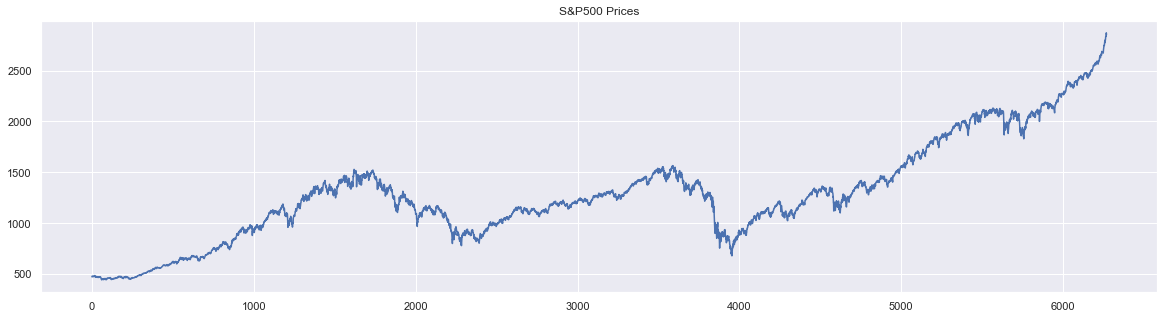

In [909]:
dfComp.spx.plot(figsize=(20,5),title ="S&P500 Prices")
plt.show()

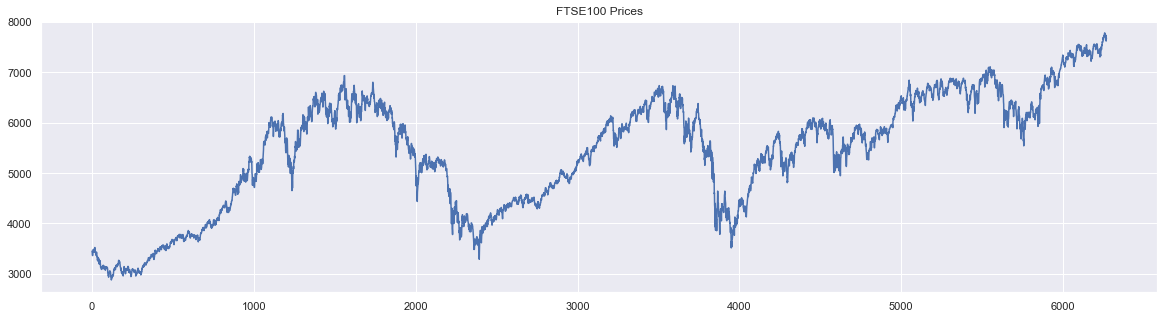

In [910]:
dfComp.ftse.plot(figsize=(20,5),title ="FTSE100 Prices")
plt.show()

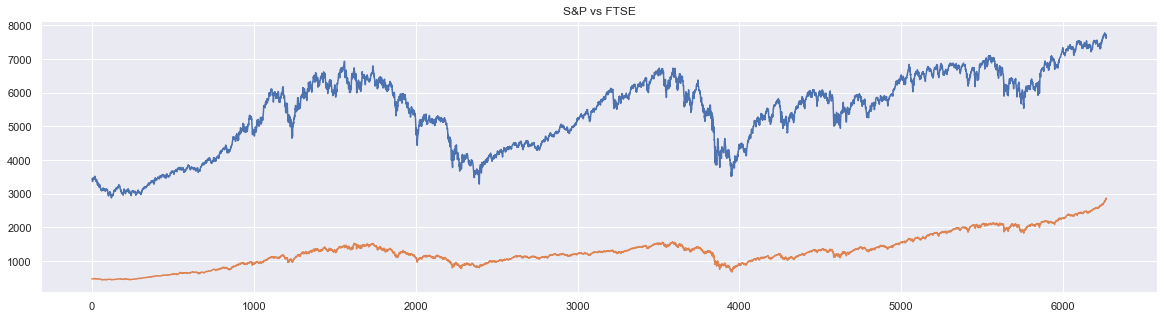

In [911]:
dfComp.ftse.plot(figsize=(20,5),title ="FTSE100 Prices")
dfComp.spx.plot(figsize=(20,5),title ="S&P500 Prices")
plt.title("S&P vs FTSE")
plt.show()

<h2> The QQ plot (Quantile-quantile plot) </h2>

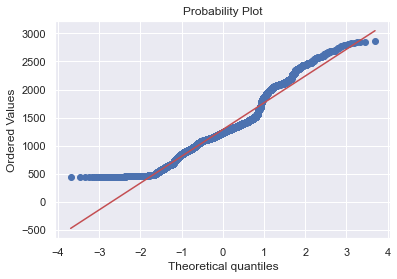

In [912]:
scipy.stats.probplot(dfComp.spx,plot = pylab)
pylab.show()

<h2> Lenght of The time Period </h2>

In [913]:
dfComp.date.describe()

count           6269
unique          6269
top       22/02/2000
freq               1
Name: date, dtype: object

<h2> From text to Date </h2>

In [914]:
dfComp.date = pd.to_datetime(dfComp.date,dayfirst= True)

In [915]:
dfComp.head()

date     spx      dax     ftse    nikkei
0 1994-01-07  469.90  2224.95  3445.98  18124.01
1 1994-01-10  475.27  2225.00  3440.58  18443.44
2 1994-01-11  474.13  2228.10  3413.77  18485.25
3 1994-01-12  474.17  2182.06  3372.02  18793.88
4 1994-01-13  472.47  2142.37  3360.01  18577.26

In [916]:
dfComp.date.describe()

<ipython-input-916-2efcb4d0fb11>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfComp.date.describe()


count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

<h2> Setting the index</h2>

In [917]:
dfComp.set_index("date", inplace = True)

In [918]:
dfComp

spx       dax         ftse    nikkei
date                                                    
1994-01-07   469.900000   2224.95  3445.980000  18124.01
1994-01-10   475.270000   2225.00  3440.580000  18443.44
1994-01-11   474.130000   2228.10  3413.770000  18485.25
1994-01-12   474.170000   2182.06  3372.020000  18793.88
1994-01-13   472.470000   2142.37  3360.010000  18577.26
...                 ...       ...          ...       ...
2018-01-23  2839.130362  13559.60  7731.827774  24124.15
2018-01-24  2837.544008  13414.74  7643.428966  23940.78
2018-01-25  2839.253031  13298.36  7615.839954  23669.49
2018-01-26  2872.867839  13340.17  7665.541292  23631.88
2018-01-29  2853.528411  13324.48  7671.533300  23629.34

[6269 rows x 4 columns]

DatetimeIndex(['1994-01-07', '1994-01-10', '1994-01-11', '1994-01-12',
               '1994-01-13', '1994-01-14', '1994-01-17', '1994-01-18',
               '1994-01-19', '1994-01-20',
               ...
               '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-29'],
              dtype='datetime64[ns]', name='date', length=6269, freq=None)

<h2> Setting the Desired Frequency </h2>

In [919]:
dfComp = dfComp.asfreq('b') #business day

In [920]:
dfComp.head()

spx      dax     ftse    nikkei
date                                          
1994-01-07  469.90  2224.95  3445.98  18124.01
1994-01-10  475.27  2225.00  3440.58  18443.44
1994-01-11  474.13  2228.10  3413.77  18485.25
1994-01-12  474.17  2182.06  3372.02  18793.88
1994-01-13  472.47  2142.37  3360.01  18577.26

<h2> Handling Missing Value </h2>


In [921]:
dfComp.isna()

spx    dax   ftse  nikkei
date                                   
1994-01-07  False  False  False   False
1994-01-10  False  False  False   False
1994-01-11  False  False  False   False
1994-01-12  False  False  False   False
1994-01-13  False  False  False   False
...           ...    ...    ...     ...
2018-01-23  False  False  False   False
2018-01-24  False  False  False   False
2018-01-25  False  False  False   False
2018-01-26  False  False  False   False
2018-01-29  False  False  False   False

[6277 rows x 4 columns]

In [922]:
dfComp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [923]:
dfComp.spx = dfComp.spx.fillna( method="ffill")

In [924]:
dfComp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [925]:
dfComp.ftse = dfComp.ftse.fillna( method="bfill")

In [926]:
dfComp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [927]:
dfComp.dax = dfComp.dax.fillna(value= dfComp.dax.mean())

In [928]:
dfComp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

<h2> Simplifying The Dataset</h2>

In [929]:
dfComp['marketValue'] = dfComp.spx

In [930]:
dfComp.describe()

spx           dax         ftse        nikkei  marketValue
count  6277.000000   6277.000000  6277.000000   6269.000000  6277.000000
mean   1288.642547   6080.063363  5423.690398  14597.055700  1288.642547
std     487.868210   2752.604984  1145.568370   4043.122953   487.868210
min     438.920000   1911.700000  2876.600000   7054.980000   438.920000
25%     992.715221   4070.460000  4487.880000  10709.290000   992.715221
50%    1233.761241   5774.380000  5663.300000  15028.170000  1233.761241
75%    1460.250000   7442.660000  6304.630175  17860.470000  1460.250000
max    2872.867839  13559.600000  7778.637689  24124.150000  2872.867839

In [931]:
#remove
del dfComp['spx']
del dfComp['dax']
del dfComp['ftse']
del dfComp['nikkei']

In [932]:
dfComp.describe()

marketValue
count  6277.000000
mean   1288.642547
std     487.868210
min     438.920000
25%     992.715221
50%    1233.761241
75%    1460.250000
max    2872.867839

<h2>Splitting the data </h2>

In [933]:
#Training Set
#Test Set
# use iloc
size = int(len(dfComp)*0.8)
size

5021

In [934]:
dfTrain = dfComp.iloc[:size]
dfTest = dfComp.iloc[size:]

In [935]:
dfTrain.tail()

marketValue
date                   
2013-04-01  1562.173837
2013-04-02  1570.252238
2013-04-03  1553.686978
2013-04-04  1559.979316
2013-04-05  1553.278930

In [936]:
dfTest.head()

marketValue
date                   
2013-04-08  1563.071269
2013-04-09  1568.607909
2013-04-10  1587.731827
2013-04-11  1593.369863
2013-04-12  1588.854623

<h2> White Noise </h2>

In [937]:
# mean
# std
wn = np.random.normal( loc = dfTrain.marketValue.mean(), scale = dfTrain.marketValue.std(), size =len(dfTrain))

In [938]:
dfTrain['wn'] = wn

<ipython-input-938-57c222df4209>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain['wn'] = wn


In [939]:
dfTrain.describe()

marketValue           wn
count  5021.000000  5021.000000
mean   1091.651926  1094.297119
std     292.559287   291.005827
min     438.920000    63.854167
25%     914.620000   894.696060
50%    1144.650000  1095.998316
75%    1316.280729  1291.575807
max    1570.252238  2070.352110

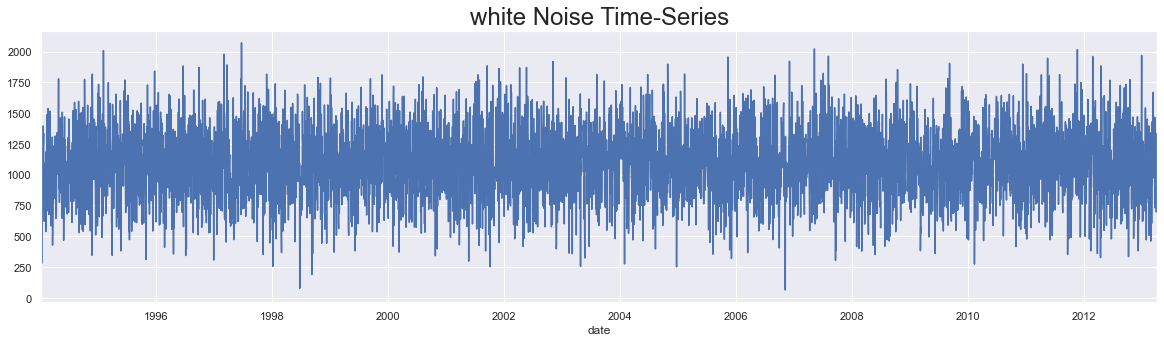

In [940]:
dfTrain.wn.plot(figsize = (20,5))
plt.title("white Noise Time-Series", size= 24)
plt.show()

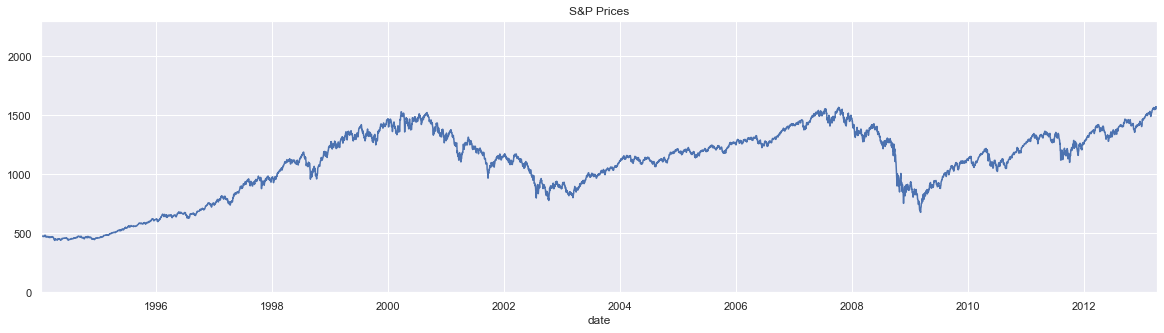

In [941]:
dfTrain.marketValue.plot(figsize=(20,5))
plt.title("S&P Prices")
plt.ylim(0,2300)
plt.show()

<h2> Random Walk </h2>

In [942]:
rw = pd.read_csv("RandWalk.csv")
rw.date= pd.to_datetime(rw.date,dayfirst=True)
rw.set_index("date", inplace = True)
rw = rw.asfreq("b")

In [943]:
rw.describe()

price
count  5021.000000
mean   1269.944293
std     444.216793
min     585.483034
25%     931.550429
50%    1156.363045
75%    1488.362029
max    2715.508720

In [944]:
dfTrain["rw"] = rw.price

<ipython-input-944-1bd030e3cffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain["rw"] = rw.price


In [945]:
dfTrain.head()

marketValue           wn           rw
date                                             
1994-01-07       469.90  1496.467160  1122.139662
1994-01-10       475.27   872.746796  1080.347860
1994-01-11       474.13  1296.691463  1082.095245
1994-01-12       474.17  1193.289343  1083.639265
1994-01-13       472.47   282.393141  1067.146255

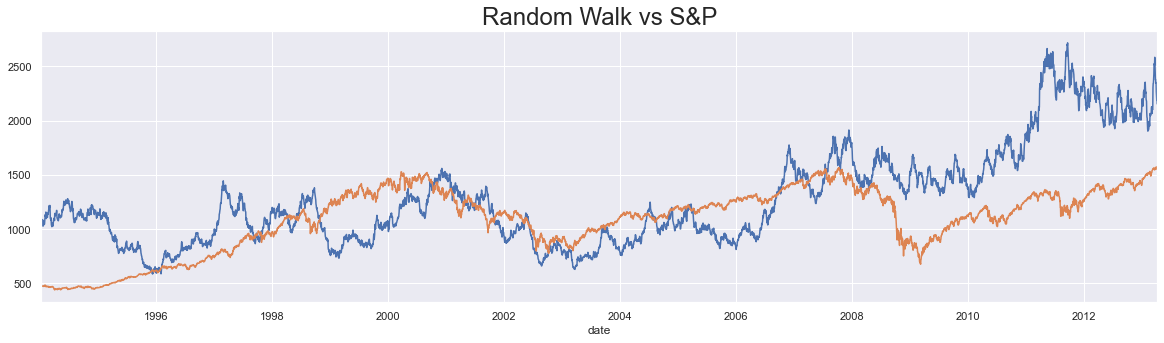

In [946]:
dfTrain.rw.plot(figsize = (20,5))
dfTrain.marketValue.plot()
plt.title("Random Walk vs S&P", size= 24)
plt.show()

<h2> Stationarity </h2>

In [947]:
#Covariance stationarity assymptions
sts.adfuller(dfTrain.marketValue)


(-1.7369847452352423,
 0.41216456967706283,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [948]:
sts.adfuller(dfTrain.wn)

(-70.17520693949395,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70750.56665308222)

In [949]:
sts.adfuller(dfTrain.rw)

(-1.32860739276897,
 0.6159849181617392,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

<h2> Seasonality </h2>

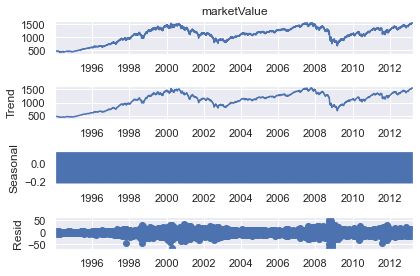

In [950]:
sDecAdditive = seasonal_decompose(dfTrain.marketValue, model = "additive")
sDecAdditive.plot()
plt.show()

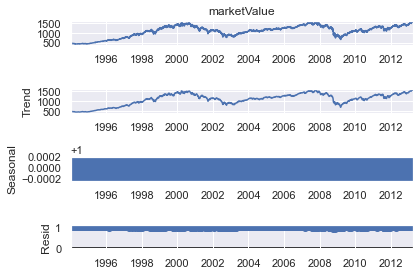

In [951]:
sDecMultiplicative = seasonal_decompose(dfTrain.marketValue, model = "multiplicative")
sDecMultiplicative.plot()
plt.show()

<h2> ACF </h2>

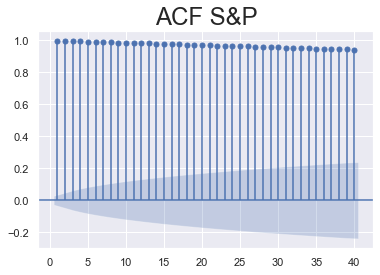

In [952]:
sgt.plot_acf(dfTrain.marketValue, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

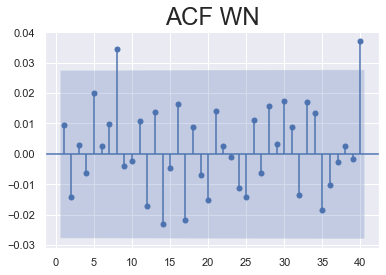

In [953]:
sgt.plot_acf(dfTrain.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

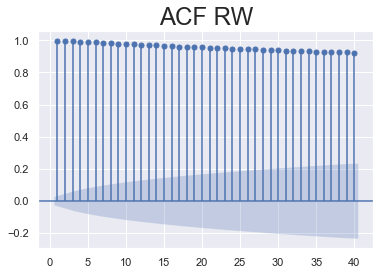

In [954]:
sgt.plot_acf(dfTrain.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

<h2> PACF </h2>

Text(0.5, 1.0, 'PACF S&P')

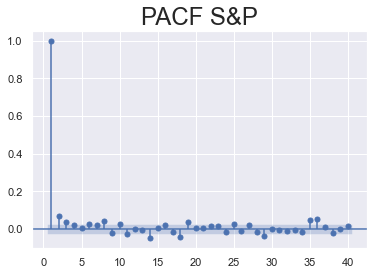

In [955]:
sgt.plot_pacf(dfTrain.marketValue, lags = 40, zero = False, method=('ols'))
plt.title('PACF S&P', size=24)


Text(0.5, 1.0, 'PACF WN')

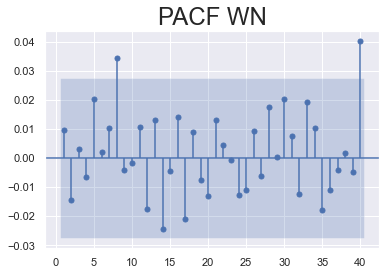

In [956]:
sgt.plot_pacf(dfTrain.wn, lags = 40, zero = False, method=('ols'))
plt.title('PACF WN', size=24)

<h2> The ACF </h2>

In [957]:
sgt.plot_acf(dfTrain.marketValue, zero = False, lags= 40)
plt.title("ACF for Prices", size = 20)
plt.show()

<h2> The PACF </h2>

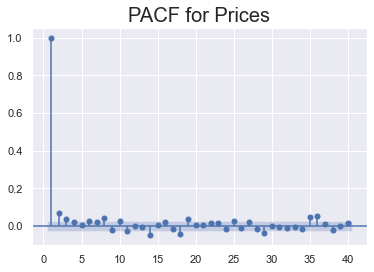

In [958]:
sgt.plot_pacf(dfTrain.marketValue, zero= False, lags = 40, alpha= 0.05, method=('ols') )
plt.title('PACF for Prices', size = 20)
plt.show()

<h2> The Ar(1) Model </h2>

In [959]:
modelAr = ARMA(dfTrain.marketValue, order=(1,0))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [960]:
resultAr = modelAr.fit()

In [961]:
resultAr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.388
Method:                       css-mle   S.D. of innovations             13.238
Date:                Tue, 09 Mar 2021   AIC                          40200.776
Time:                        13:13:40   BIC                          40220.340
Sample:                    01-07-1994   HQIC                         40207.631
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1062.8549    228.002      4.662      0.000     615.978    1509.731
ar.L1.marketValue     0.9994      0.001   1911.943      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

<h2> Higher-Lag AR Models </h2>

In [962]:
modelAr2 = ARMA(dfTrain.marketValue, order=(2,0))


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [963]:
resultAr2 = modelAr2.fit()
resultAr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20085.281
Method:                       css-mle   S.D. of innovations             13.206
Date:                Tue, 09 Mar 2021   AIC                          40178.562
Time:                        13:13:41   BIC                          40204.647
Sample:                    01-07-1994   HQIC                         40187.702
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1069.7156    247.865      4.316      0.000     583.910    1555.521
ar.L1.marketValue     0.9300      0.014     68.002      0.000       0.903       0.957
ar.L2.marketValue     0.0694      0.014      5.071      0.000       0.043       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2          -14.4042           +0.0000j           14.4042            0.5000
-----------------------------------------------------------------------------
"""

In [964]:
modelAr3 = ARMA(dfTrain.marketValue, order=(3,0))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [965]:
resultAr3 = modelAr3.fit()
resultAr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20082.347
Method:                       css-mle   S.D. of innovations             13.198
Date:                Tue, 09 Mar 2021   AIC                          40174.694
Time:                        13:13:42   BIC                          40207.301
Sample:                    01-07-1994   HQIC                         40186.120
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1053.4021    259.502      4.059      0.000     544.788    1562.016
ar.L1.marketValue     0.9277      0.014     68.258      0.000       0.901       0.954
ar.L2.marketValue     0.0376      0.019      1.989      0.047       0.001       0.075
ar.L3.marketValue     0.0342      0.014      2.424      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0504           -5.3037j            5.4067           -0.2811
AR.3           -1.0504           +5.3037j            5.4067            0.2811
-----------------------------------------------------------------------------
"""

In [966]:
modelAr4 = ARMA(dfTrain.marketValue, order=(4,0))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [967]:
resultAr4 = modelAr4.fit()
resultAr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Tue, 09 Mar 2021   AIC                          40174.512
Time:                        13:13:43   BIC                          40213.640
Sample:                    01-07-1994   HQIC                         40188.223
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1061.8914    264.853      4.009      0.000     542.788    1580.995
ar.L1.marketValue     0.9270      0.014     68.562      0.000       0.900       0.953
ar.L2.marketValue     0.0368      0.019      1.952      0.051      -0.000       0.074
ar.L3.marketValue     0.0149      0.019      0.772      0.440      -0.023       0.053
ar.L4.marketValue     0.0208      0.014      1.477      0.140      -0.007       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -3.9310           -0.0000j            3.9310           -0.5000
AR.3            1.1090           -3.3121j            3.4929           -0.1986
AR.4            1.1090           +3.3121j            3.4929            0.1986
-----------------------------------------------------------------------------
"""

<h2> LLR Test </h2>

In [968]:
def LLRTest(mod1,mod2,DF=1):
    L1 = mod1.fit().llf
    L2 = mod2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

<h2> Comparing Higher-Lag AR Models </h2>

In [969]:
LLRTest(modelAr2,modelAr3)

0.015

In [970]:
LLRTest(modelAr3,modelAr4)

0.14

In [971]:
modelAr4 = ARMA(dfTrain.marketValue, order=(4,0))
resultAr4 = modelAr4.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [972]:
print(resultAr4.summary())

                              ARMA Model Results                              
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Tue, 09 Mar 2021   AIC                          40174.512
Time:                        13:13:49   BIC                          40213.640
Sample:                    01-07-1994   HQIC                         40188.223
                         - 04-05-2013                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1061.8914    264.853      4.009      0.000     542.788    1580.995
ar.L1.marketValue     0.9270      0.014     68.562      0.000       0.900       0.953
ar.L2.marketValue     0.

In [973]:
print("LLR test: p-value" + str(LLRTest(modelAr3, modelAr4)))

LLR test: 0.14


In [974]:
modelAr5 = ARMA(dfTrain.marketValue, order=(5,0))
resultAr5 = modelAr5.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [975]:
print(resultAr5.summary())
print("LLR test: p-value" + str(LLRTest(modelAr4, modelAr5)))

                              ARMA Model Results                              
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -20081.157
Method:                       css-mle   S.D. of innovations             13.195
Date:                Tue, 09 Mar 2021   AIC                          40176.314
Time:                        13:13:53   BIC                          40221.963
Sample:                    01-07-1994   HQIC                         40192.310
                         - 04-05-2013                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1054.5059    267.790      3.938      0.000     529.647    1579.365
ar.L1.marketValue     0.9268      0.013     68.700      0.000       0.900       0.953
ar.L2.marketValue     0.

In [976]:
modelAr6 = ARMA(dfTrain.marketValue, order=(6,0))
resultAr6 = modelAr6.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [977]:
print(resultAr6.summary())
print("LLR test: p-value" + str(LLRTest(modelAr5, modelAr6)))

                              ARMA Model Results                              
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -20079.653
Method:                       css-mle   S.D. of innovations             13.191
Date:                Tue, 09 Mar 2021   AIC                          40175.306
Time:                        13:13:58   BIC                          40227.477
Sample:                    01-07-1994   HQIC                         40193.587
                         - 04-05-2013                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1048.6398    276.368      3.794      0.000     506.969    1590.311
ar.L1.marketValue     0.9267      0.013     69.313      0.000       0.900       0.953
ar.L2.marketValue     0.

In [978]:
modelAr7 = ARMA(dfTrain.marketValue, order=(7,0))
resultAr7 = modelAr7.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [979]:
print(resultAr7.summary())
print("LLR test: p-value" + str(LLRTest(modelAr6, modelAr7)))

                              ARMA Model Results                              
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -20078.387
Method:                       css-mle   S.D. of innovations             13.187
Date:                Tue, 09 Mar 2021   AIC                          40174.773
Time:                        13:14:06   BIC                          40233.466
Sample:                    01-07-1994   HQIC                         40195.340
                         - 04-05-2013                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1057.1322    282.246      3.745      0.000     503.940    1610.324
ar.L1.marketValue     0.9261      0.013     69.878      0.000       0.900       0.952
ar.L2.marketValue     0.

In [980]:
modelAr8 = ARMA(dfTrain.marketValue, order=(8,0))
resultAr8 = modelAr8.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [981]:
print(resultAr8.summary())
print("LLR test: p-value" + str(LLRTest(modelAr7, modelAr8)))

                              ARMA Model Results                              
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -20074.309
Method:                       css-mle   S.D. of innovations             13.177
Date:                Tue, 09 Mar 2021   AIC                          40168.619
Time:                        13:14:16   BIC                          40233.833
Sample:                    01-07-1994   HQIC                         40191.470
                         - 04-05-2013                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1053.8512    295.248      3.569      0.000     475.176    1632.526
ar.L1.marketValue     0.9252      0.013     71.264      0.000       0.900       0.951
ar.L2.marketValue     0.

In [983]:
print("LLR Test: " + str(LLRTest(modelAr,modelAr7, DF = 6)))

LLR Test: 0.0


<h2> The DF-Test </h2>

In [984]:
sts.adfuller(dfTrain.marketValue)

(-1.7369847452352423,
 0.41216456967706283,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

<h2> Using Returns </h2>

In [986]:
dfTrain['returns'] = dfTrain.marketValue.pct_change(1).mul(100)
dfTrain = dfTrain.iloc[1:]

<ipython-input-986-a619e876b68e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain['returns'] = dfTrain.marketValue.pct_change(1).mul(100)


In [987]:
sts.adfuller(dfTrain.returns)

(-17.03445719098118,
 8.280537020317061e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 16035.926219345132)